# CNOD Protocol 
This file is meant to produce cat states using the CNOD gates and calculate the fidelity of the obtained states. This file is to be used after calibrating the gate. 

In [59]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from func import *
from System import *                                                                                                                                                                         
from Gates import *
from Visualization import *
import qutip as qt
import matplotlib.pyplot as plt
from scipy import optimize
import datetime
current_date = datetime.datetime.now().strftime("%Y%m%d_")

import os, sys
p_current = os.getcwd() #当前文件所在的文件夹路径：第一级父路径
p_parent = os.path.abspath(os.path.join(p_current,os.pardir)) # 当前文件所在的文件夹路径的父文件夹路径： 第二级父路径  http://www.moonapi.com/news/1923.html
sys.path.insert(1,p_parent) 

# Uncomment the two lines below to use interactive plots
# %matplotlib widget
# plt.ion()

In [60]:
npts = 250 # number of points in Wigner function plots
max_alpha = 6.0 # alpha max limit in Wigner function plots
dpi = 300 # dpi for saved pictures

### Choose your gate parameters. You may also find some pre-calibrated CNODs below

In [69]:
# Units: GHz, ns
is_cut_tail_antisym = True

if 1:
    "Calibration parameters, chi = 1 MHz, epsilon = 94"
    CNOD_total_gate = int(round(292.81,0)) # Get from ECD File
    CNOD_alpha_time = (CNOD_total_gate * 3)//4 + 1
    CNOD_beta_time = CNOD_total_gate - CNOD_alpha_time
    CNOD_t_scale = 1.0 # for second CNOD
    alpha = 4.0 
    disp05amp = (21779713.7523335408 if is_cut_tail_antisym else 117500000) #calibrate for each set of pulse parameters by fixing alpha
    calibration_param = disp05amp
    alpha_scale = 0.976 # for second CNOD
    timestep = 1
    additional_D_scale = 0
    t_start = 0

# if 0:
#     "Calibration parameters, chi = 0.7 MHz, epsilon = 100"
#     CNOD_total_gate = int(round(309.83,0))
#     CNOD_alpha_time = (CNOD_total_gate * 3)//4 + 1
#     CNOD_beta_time = CNOD_total_gate - CNOD_alpha_time
#     CNOD_t_scale = 1.0 # for second CNOD
#     alpha = 4.0 
#     disp05amp = 213500000 #calibrate for each set of pulse parameters by fixing alpha
#     alpha_scale = 0.9782 # for second CNOD
#     timestep = 1
#     additional_D_scale = 0

# if 0:
#     "Calibration parameters, chi = 0.5 MHz, epsilon = 100"
#     CNOD_total_gate = int(round(419.952,0))
#     CNOD_alpha_time = (CNOD_total_gate * 3)//4 + 1
#     CNOD_beta_time = CNOD_total_gate - CNOD_alpha_time
#     CNOD_t_scale = 1.0 # for second CNOD
#     alpha = 4.0 
#     disp05amp = 224000000 #calibrate for each set of pulse parameters by fixing alpha
#     alpha_scale = 0.976 # for second CNOD
#     timestep = 1
#     additional_D_scale = 0

# if 0:
#     "Calibration parameters, chi = 60 KHz, epsilon = 200"
#     CNOD_total_gate = int(round(722.40,0))
#     CNOD_alpha_time = (CNOD_total_gate * 3)//4 + 1
#     CNOD_beta_time = CNOD_total_gate - CNOD_alpha_time
#     CNOD_t_scale = 1.0 # for second CNOD
#     alpha = 4.0 
#     disp05amp = 5250000000 #calibrate for each set of pulse parameters by fixing alpha
#     alpha_scale = 0.91 # for second CNOD
#     timestep = 1
#     additional_D_scale = 0


t_start = 0
calibration_param = disp05amp
chi = EPSILON
chi =  CHI * 1e-3  # GHz
print("Chi:",chi/2/np.pi, "GHz")
detuning = -chi/1e6
print("Total protocol time:", CNOD_total_gate)
print("CNOD Alpha gate time:", CNOD_alpha_time)
print("CNOD Beta gate time:", CNOD_beta_time)

Chi: 0.001 GHz
Total protocol time: 293
CNOD Alpha gate time: 220
CNOD Beta gate time: 73


### Projectors and Loss and Expectation parameters

In [70]:
proj_e_a = qt.tensor(basis(2,1)*basis(2,1).dag(), destroy(N))
proj_g_a = qt.tensor(basis(2,0)*basis(2,0).dag(), destroy(N))
conv = 1e3
# c_ops = calc_loss(260*conv, 260*conv, 18*conv, 7*conv)
# c_ops = calc_loss(np.inf, np.inf, np.inf, np.inf)
c_ops = []
e_ops = [2 *  proj_e_a, 2 * proj_g_a] # Use this if your initial state is |g> + |e>
e_ops = [proj_g_a] # Use this if your initial state is |g> or |e> 

### Choose your inital state, then execute the code below. It will plot every step of the protecol sequence

ket
10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.06s. Est. time left: 00:00:00:00
30.0%. Run time:   0.11s. Est. time left: 00:00:00:00
40.0%. Run time:   0.14s. Est. time left: 00:00:00:00
50.0%. Run time:   0.18s. Est. time left: 00:00:00:00
60.0%. Run time:   0.22s. Est. time left: 00:00:00:00
70.0%. Run time:   0.26s. Est. time left: 00:00:00:00
80.0%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.08s. Est. time left: 00:00:00:00
30.0%. Run time:   0.14s. Est. time left: 00:00:00:00
40.0%. Run time:   0.18s. Est. time left: 00:00:00:00
50.0%. Run time:   0.25s. Est. time left: 00:00:00:00
60.0%. Run time:   0.34s. Est. time left: 00:00:00:00
70.0%. Run time:   0.39s. Est. time left: 00:00:00:00
80.0%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00


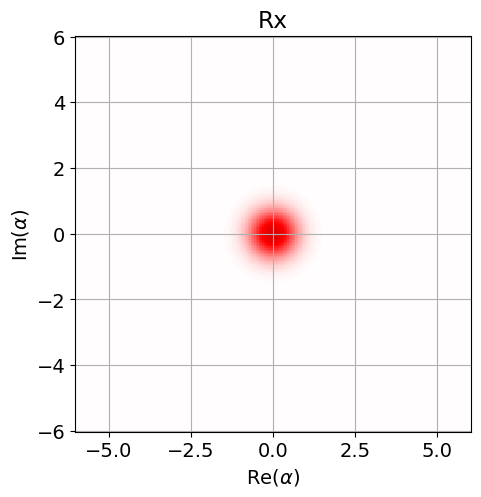

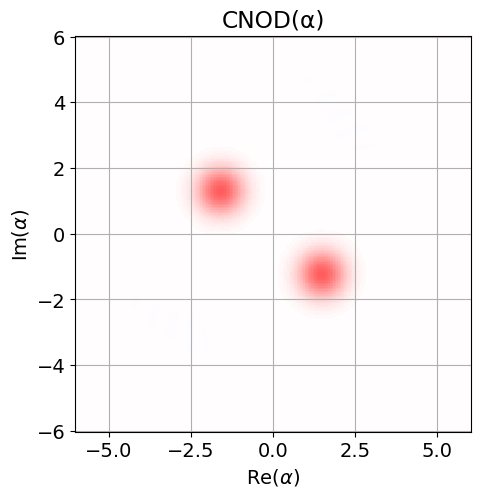

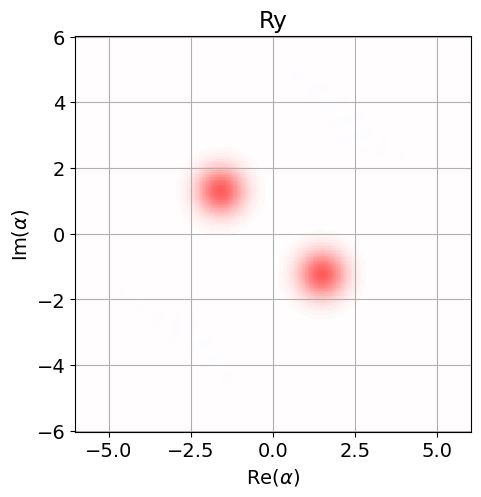

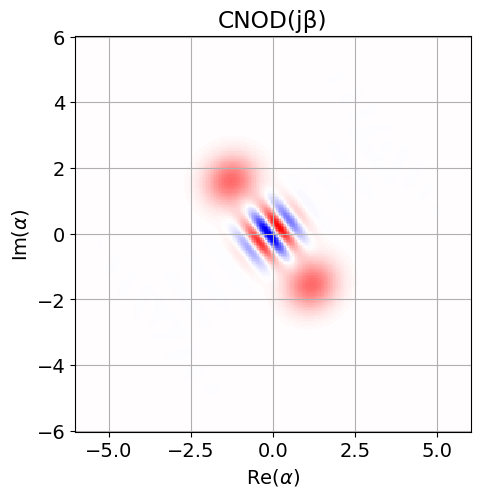

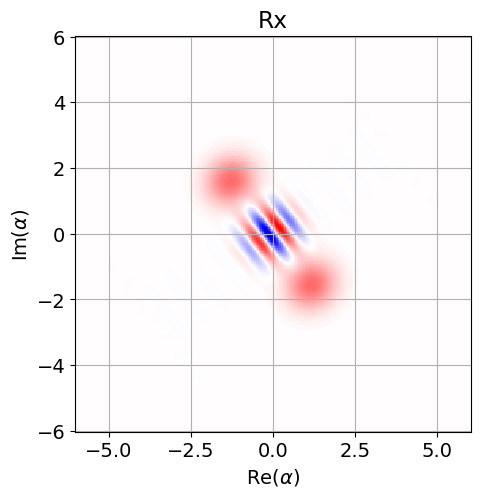

In [71]:
def rotate_mode(phi, rho):
    a = tensor(qeye(2), destroy(N))
    op = (-1j*phi*a.dag()*a).expm()
    if isket(rho):
        return op*(rho)
    return op*(rho)*op.dag()

state_0 = vac
# state_0 = qt.tensor(qt.fock(2,0),qt.fock(N,0))

# state_0 = ket2dm(vac)
if state_0.isket:
    print("ket")
    "state preparation"
    # fig, axes = plt.subplots(5, 1,figsize = (4, 26), dpi=dpi) # Create a 2-plot figure

    cbar_bool = False
    state_1 = Rx(np.pi/2) * state_0 
    plot_wigner_home(state_1, npts=npts, cbar=cbar_bool)#, ax=axes[0])
    # axes[0].set_title("Rx")
    plt.title("Rx")
        
    state_2 = CNOD_ket(alpha, calibration_param, state_1, t_start, CNOD_alpha_time, timestep, chi, detuning, c_ops, e_ops, is_cut_tail_antisym=is_cut_tail_antisym)
    plot_wigner_home(state_2, npts=npts, cbar=cbar_bool)#, ax=axes[1])
    # axes[1].set_title("CNOD(α)")
    plt.title("CNOD(α)")

    state_3 = Ry(np.pi/2) * state_2 
    plot_wigner_home(state_3, npts=npts, cbar=cbar_bool)#, ax=axes[2])
    # axes[2].set_title("Ry")
    plt.title("Ry")
    
    theta = CNOD_alpha_time / 2 * chi
    print("\n Tetha degrees:", theta*180/np.pi)

    #Second CNOD e^i*theta, theta = CNOD_alpha_time/2*chi
    beta = 1j * np.exp(- 1j * theta) *alpha*alpha_scale  
    # beta = np.exp(-1j * np.pi/2)
    # state_4 = CNOD_ket(beta, calibration_param, state_3, t_start, CNOD_beta_time, timestep, chi, detuning, c_ops, e_ops)
    state_4 = CNOD_ket(beta, calibration_param, state_3, t_start, CNOD_beta_time, timestep, chi, detuning, c_ops, e_ops, is_cut_tail_antisym=is_cut_tail_antisym)
    plot_wigner_home(state_4, npts=npts, cbar=cbar_bool)#, ax=axes[3])
    # axes[3].set_title("CNOD(jβ)")
    plt.title("CNOD(jβ)")

    state_5 = Rx(np.pi/2) * state_4 
    plot_wigner_home(state_5, npts=npts, cbar=cbar_bool)#, ax=axes[4])
    plt.title("Rx")
    # axes[4].set_title("Rx")
       
else:
    print("USE KET") 

tetha degrees: 52.74000000000001


Text(0.5, 1.0, 'Frame update')

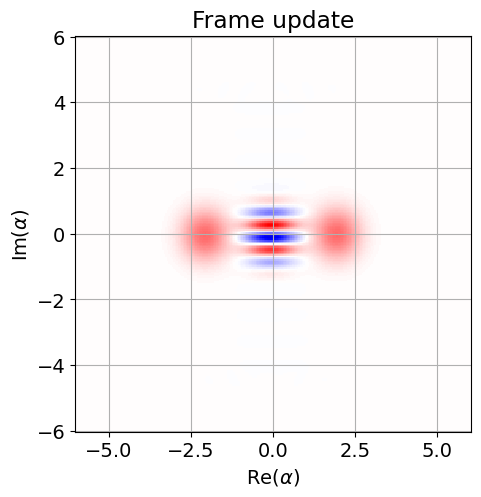

In [72]:
theta = - CNOD_total_gate / 2 * chi
print("tetha degrees:", -theta*180/np.pi)
state_5_rotated = rotate_mode(theta, state_5)
plot_wigner_home(state_5_rotated, npts=npts, cbar=cbar_bool)
plt.title("Frame update")

## Calculate Fidelity 

In [67]:
result_state = state_5_rotated
if 0: 
    # No relative phase or choose arbitrary angle (theta = 0)
    theta_list = [0]  
if 1:  
    # The final state has a relative qubit phase!
    theta_list = np.linspace(51.1, 51.3, 5) # Choose the number of angles to check fidelity for

theoretical_list, fidelity_list = [], []

for theta in theta_list:
    rad = theta * np.pi/180
    theoretical = ( tensor(qt.fock(2,0), (qt.coherent(N,1*alpha/2) - np.exp(1j*rad) * qt.coherent(N,-1*alpha/2)).unit() )) # with Phase
    fid = fidelity(theoretical, result_state)
    theoretical_list.append(theoretical)
    fidelity_list.append(fid)

max_fidelity = np.max(np.array(fidelity_list))
max_fidelity_index = np.argmax(np.array(fidelity_list))
theta_degrees = theta_list[max_fidelity_index]
rad = theta_degrees * np.pi/180
theo = ( tensor(qt.fock(2,0), (qt.coherent(N,1*alpha/2) - np.exp(1j*rad) * qt.coherent(N,-1*alpha/2)).unit() )) # with Phase

print("Theta degrees (max fid):", theta_degrees, "deg")
print("Max achieved fidelity:", max_fidelity*100, "%")

Theta degrees (max fid): 51.2 deg
Max achieved fidelity: 97.34681966940974 %


Shapes: (2000, 1) (2000, 1)
Fidelity:  97.34681966940974 %


Text(-5.0, 2.1, 'Fidelity ≈ 97.34682%')

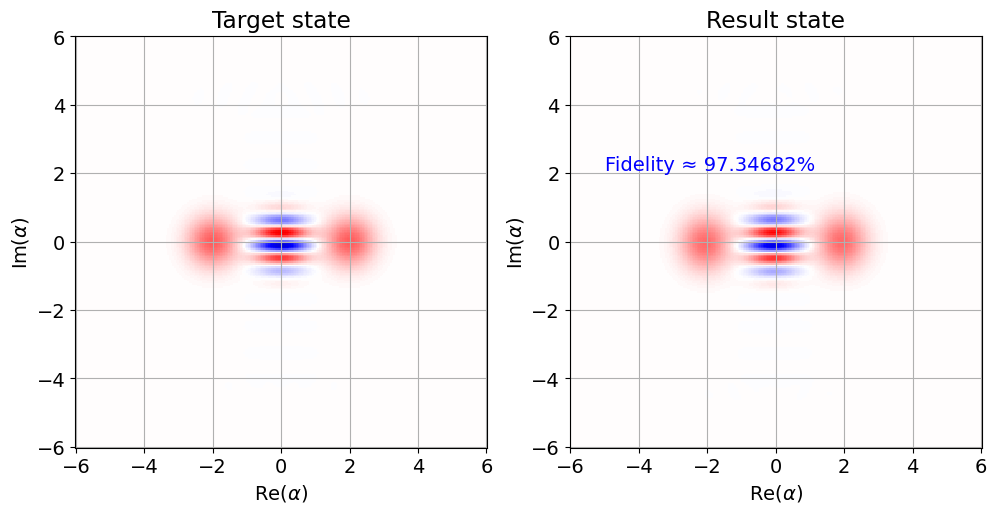

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [68]:
fig, axes = plt.subplots(1, 2) # Create a 2-plot figure

print("Shapes:", (theo).shape, result_state.shape)
print("Fidelity: ", max_fidelity*100, "%")

# Target state plot
plot_wigner_home(theo, npts=npts, max_alpha=max_alpha, ax=axes[0])  
axes[0].set_title("Target state")
      
# Result state plot
plot_wigner_home(result_state, npts=npts, max_alpha=max_alpha, ax=axes[1])
axes[1].set_title("Result state")
axes[1].annotate(f"Fidelity ≈ {round(max_fidelity*100,5)}%", (-5.0,2.1), c='blue')